# PyCaret

前処理，ハイパーパラメータのチューニング，推論を自動実行できるモジュール

## データセットの読み込み(ボストン住宅価格)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.model_selection import train_test_split

boston = load_boston()
df_x_boston = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df_y_boston = pd.DataFrame(boston['target'], columns=['MEDV'])
df_boston = pd.concat([df_x_boston, df_y_boston], axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_x_boston, df_y_boston, test_size=0.3, random_state=0)

df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

In [2]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [3]:
y_train

,MEDV
141,14.4
272,24.4
135,18.1
298,22.5
122,20.5
...,...
323,18.5
192,36.4
117,19.2
47,16.6


## PyCaret動作確認

In [4]:
import pycaret
pycaret.__version__

'2.3.10'

In [5]:
import numpy as np
numpy_version = tuple(map(int, np.__version__.split('.')[:2]))
if (numpy_version > (1, 20)):
    !pip install numpy==1.20 --upgrade

In [6]:
import sklearn
sklearn_version = tuple(map(int, sklearn.__version__.split('.')[:3]))
if (sklearn_version != (0, 23, 2)):
    !pip install scikit-learn==0.23.2 --upgrade

In [7]:
import scipy
scipy_version = tuple(map(int, scipy.__version__.split('.')[:3]))
if (scipy_version > (1, 5, 4)):
    !pip install scipy==1.5.4 --upgrade

In [8]:
from pycaret.regression import *
import shap
reg1 = setup(data=df_train, target='MEDV')

,Description,Value
0,session_id,334
1,Target,MEDV
2,Original Data,"(354, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(247, 13)"


In [9]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1169,10.1157,3.0292,0.8727,0.1349,0.1062,0.0390
lightgbm,Light Gradient Boosting Machine,2.4746,13.1211,3.5148,0.8302,0.1559,0.1235,0.0570
gbr,Gradient Boosting Regressor,2.5346,13.7571,3.5508,0.8244,0.1569,0.1247,0.0100
rf,Random Forest Regressor,2.5039,14.6265,3.5748,0.8220,0.1575,0.1239,0.0460
ada,AdaBoost Regressor,2.9077,16.8588,3.9545,0.7811,0.1769,0.1496,0.0110
lr,Linear Regression,3.2922,23.4539,4.5862,0.7040,0.2214,0.1628,0.2320
ridge,Ridge Regression,3.3171,23.7516,4.6208,0.7010,0.2383,0.1660,0.0040
br,Bayesian Ridge,3.4321,24.7388,4.7531,0.6889,0.2569,0.1712,0.0030
lar,Least Angle Regression,3.4597,25.4387,4.8496,0.6658,0.2315,0.1713,0.0040
en,Elastic Net,3.6624,26.5606,4.9727,0.6650,0.2530,0.1775,0.0030


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=334, verbose=0, warm_start=False)

In [10]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0039,6.7452,2.5972,0.7905,0.1026,0.0888
1,2.9060,16.1441,4.0180,0.7611,0.1732,0.1499
2,3.0987,29.3020,5.4131,0.7129,0.2096,0.1509
3,2.8437,16.1550,4.0193,0.8538,0.1749,0.1185
4,1.9573,6.0780,2.4654,0.8681,0.1221,0.1019
5,2.2250,8.4711,2.9105,0.8775,0.1366,0.1069
6,2.7976,12.8782,3.5886,0.8382,0.1575,0.1339
7,3.4667,28.1017,5.3011,0.7564,0.1640,0.1248
8,2.1567,8.5075,2.9168,0.8401,0.2149,0.1766


In [11]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7423,5.0123,2.2388,0.8443,0.0967,0.0783
1,3.5345,22.1791,4.7095,0.6718,0.2051,0.1856
2,2.9115,24.5554,4.9553,0.7594,0.1970,0.1480
3,2.6008,13.9917,3.7406,0.8734,0.1562,0.1100
4,2.3290,8.6587,2.9426,0.8121,0.1457,0.1236
5,2.2767,9.1588,3.0264,0.8675,0.1327,0.1035
6,2.3885,9.6874,3.1125,0.8783,0.1361,0.1151
7,2.8606,21.1408,4.5979,0.8167,0.1412,0.1025
8,2.3888,9.6976,3.1141,0.8177,0.2069,0.1773


In [12]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3264,3.2344,1.7984,0.8996,0.0783,0.0614
1,2.5948,12.3992,3.5213,0.8165,0.1543,0.1359
2,3.0164,24.4226,4.9419,0.7607,0.2004,0.1573
3,2.4416,13.8275,3.7185,0.8749,0.1369,0.0971
4,1.8444,5.5825,2.3627,0.8789,0.1130,0.0912
5,1.7460,6.5904,2.5672,0.9047,0.1216,0.0840
6,2.4718,9.0106,3.0018,0.8868,0.1288,0.1137
7,2.5325,16.5874,4.0728,0.8562,0.1224,0.0930
8,1.7998,6.1990,2.4898,0.8835,0.2052,0.1578


In [13]:
tuned_et = tune_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.5452,3.5604,1.8869,0.8894,0.0849,0.0723
1,2.6087,12.9808,3.6029,0.8079,0.1694,0.1418
2,2.9156,26.4498,5.1429,0.7409,0.2038,0.1526
3,2.6293,15.7828,3.9728,0.8572,0.1467,0.1000
4,2.0292,6.4391,2.5375,0.8603,0.1237,0.1034
5,1.8985,7.0226,2.6500,0.8984,0.1218,0.0893
6,2.2490,7.7458,2.7831,0.9027,0.1260,0.1051
7,3.1446,26.9067,5.1872,0.7667,0.1547,0.1142
8,1.8201,6.1971,2.4894,0.8835,0.2130,0.1692


In [14]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.7405,4.9129,2.2165,0.8474,0.0934,0.0778
1,2.9299,16.3900,4.0485,0.7575,0.1836,0.1539
2,3.4370,37.5129,6.1248,0.6325,0.2286,0.1689
3,2.9093,18.1638,4.2619,0.8357,0.1697,0.1154
4,2.1807,7.8181,2.7961,0.8304,0.1444,0.1165
5,1.9282,6.2005,2.4901,0.9103,0.1216,0.0921
6,2.3964,9.2751,3.0455,0.8835,0.1426,0.1165
7,3.6181,33.6391,5.7999,0.7083,0.1794,0.1359
8,2.0042,6.7769,2.6032,0.8726,0.2065,0.1690


In [15]:
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8302,5.5120,2.3478,0.8288,0.1152,0.0913
1,2.4771,12.6175,3.5521,0.8133,0.1963,0.1541
2,3.2633,36.0949,6.0079,0.6464,0.2347,0.1690
3,3.1985,22.8733,4.7826,0.7930,0.1585,0.1229
4,2.4224,8.7085,2.9510,0.8110,0.1469,0.1302
5,2.2078,8.2108,2.8655,0.8813,0.1273,0.1040
6,2.5982,9.3786,3.0625,0.8822,0.1289,0.1204
7,3.7051,35.5330,5.9610,0.6919,0.1815,0.1325
8,2.1514,8.6740,2.9452,0.8369,0.2482,0.2064


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


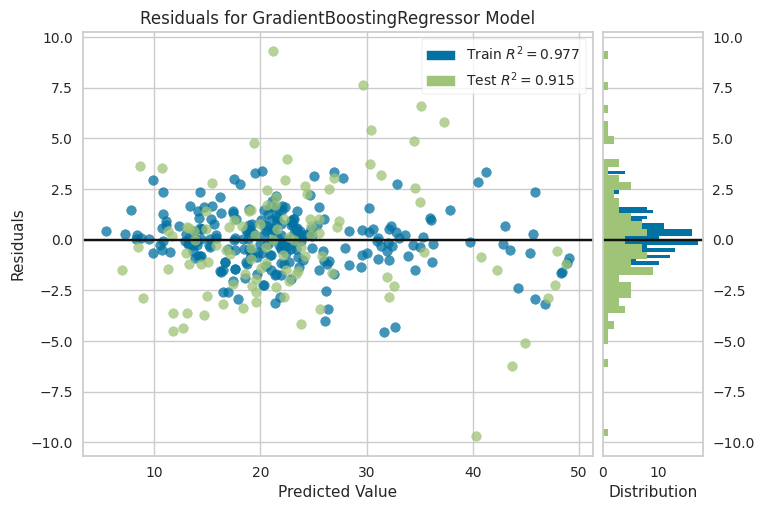

In [16]:
plot_model(tuned_gbr)

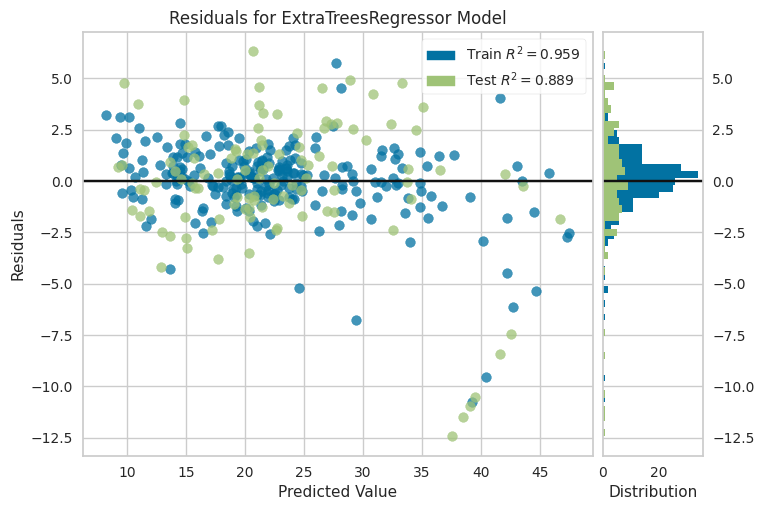

In [17]:
plot_model(tuned_et)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


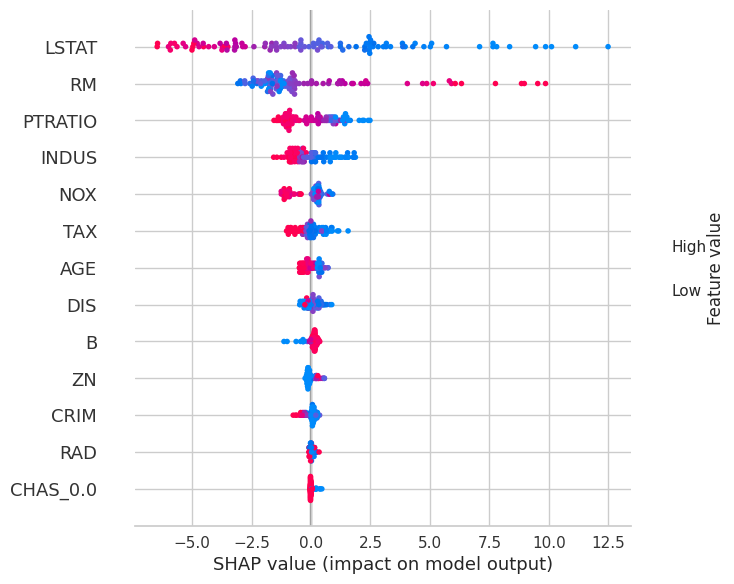

In [18]:
interpret_model(tuned_et)

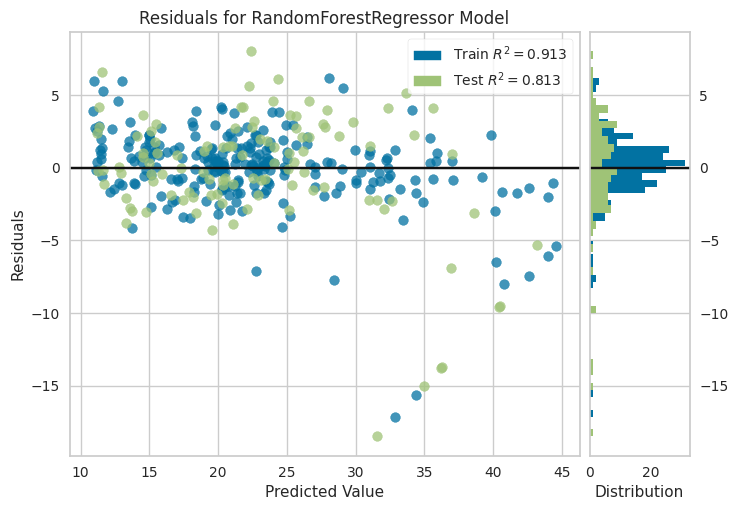

In [19]:
plot_model(tuned_rf)

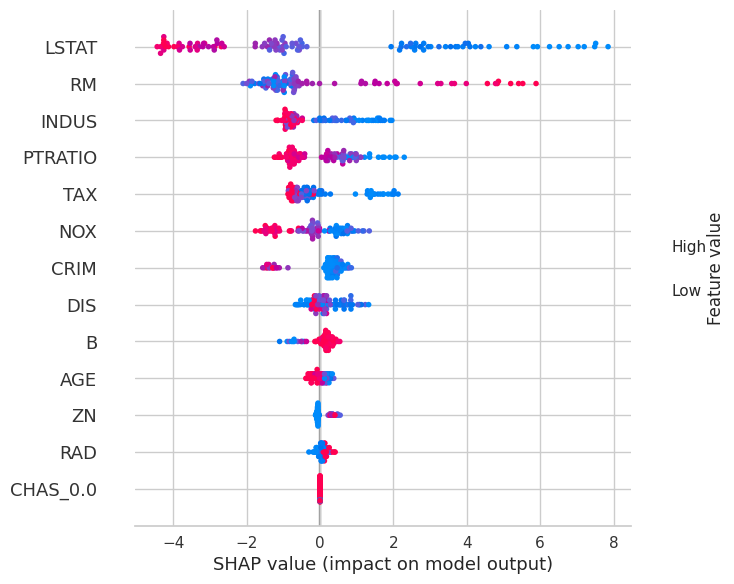

In [20]:
interpret_model(tuned_rf)

In [21]:
predictions = predict_model(tuned_gbr, data=df_test)
predictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.5868,18.2414,4.2710,0.7809,0.1714,0.1237


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Label
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34,22.6,25.802286
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0,26.471469
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0,23.928356
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77,8.3,9.656698
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34,21.2,20.964551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,32.358432
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24.0,666.0,20.2,96.73,21.52,11.0,10.238851
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81,7.2,7.672684
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,396.90,4.54,22.8,28.903226


In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

r2 = r2_score(predictions['MEDV'], predictions['Label'])
mae = mean_absolute_error(predictions['MEDV'], predictions['Label'])

print("R2 : %.3f" % r2)
print("MAE : %.3f" % mae)

R2 : 0.781
MAE : 2.587


### データの標準化

RAWデータをそのまま入力してもあまり精度はよくなかったので，標準化してからPyCaretに渡してみる．

In [23]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
df_train_std = pd.DataFrame(sc.transform(x_train), columns=boston['feature_names'])
df_test_std = pd.DataFrame(sc.transform(x_test), columns=boston['feature_names'])

df_train_std['MEDV'] = y_train.values
df_test_std['MEDV'] = y_test.values

In [25]:
reg2 = setup(data=df_train_std, target='MEDV')

,Description,Value
0,session_id,4108
1,Target,MEDV
2,Original Data,"(354, 14)"
3,Missing Values,False
4,Numeric Features,12
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(247, 13)"


In [26]:
reg2_best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.1549,9.9392,2.9755,0.8636,0.1341,0.1065,0.0500
gbr,Gradient Boosting Regressor,2.2055,11.7944,3.2154,0.8463,0.1404,0.1079,0.0110
lightgbm,Light Gradient Boosting Machine,2.4268,12.6315,3.4420,0.8302,0.1514,0.1202,0.0490
rf,Random Forest Regressor,2.3849,13.9794,3.4483,0.8236,0.1515,0.1189,0.0560
ada,AdaBoost Regressor,2.7927,16.6701,3.8425,0.7907,0.1721,0.1427,0.0110
knn,K Neighbors Regressor,2.8585,19.3045,4.2889,0.7450,0.1711,0.1338,0.0070
br,Bayesian Ridge,3.1842,21.9203,4.5479,0.7045,0.2282,0.1578,0.0040
ridge,Ridge Regression,3.2330,22.1376,4.5853,0.7010,0.2308,0.1604,0.0040
huber,Huber Regressor,3.0844,22.0580,4.5515,0.7000,0.2492,0.1515,0.0040
lr,Linear Regression,3.2517,22.2315,4.5997,0.6995,0.2320,0.1614,0.0040


In [27]:
reg2_best

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=4108, verbose=0, warm_start=False)

In [28]:
reg2_gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0571,26.6993,5.1671,0.7964,0.1853,0.1435
1,3.1455,34.9135,5.9088,0.4459,0.1892,0.1238
2,2.3189,8.7830,2.9636,0.9110,0.1329,0.1071
3,1.9948,7.5176,2.7418,0.9194,0.1616,0.1313
4,1.7266,5.2497,2.2912,0.9251,0.1079,0.0903
5,2.1015,7.2516,2.6929,0.8708,0.1393,0.1140
6,1.8101,5.6860,2.3845,0.9328,0.1066,0.0905
7,1.8886,5.7761,2.4034,0.9192,0.0920,0.0756
8,2.3198,10.4849,3.2380,0.8307,0.1463,0.1009


In [29]:
reg2_gbr_tuned = tune_model(reg2_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9758,26.3770,5.1359,0.7989,0.1979,0.1498
1,3.0357,30.7482,5.5451,0.5120,0.1791,0.1243
2,2.1395,8.4551,2.9078,0.9143,0.1855,0.1091
3,2.0735,6.8412,2.6156,0.9266,0.1503,0.1312
4,1.6899,5.1607,2.2717,0.9263,0.0873,0.0753
5,2.0578,6.0536,2.4604,0.8921,0.1222,0.1108
6,2.8979,11.9748,3.4605,0.8585,0.1685,0.1517
7,2.3343,7.7702,2.7875,0.8913,0.1113,0.0974
8,2.7811,12.1848,3.4907,0.8033,0.1362,0.1122


In [30]:
from sklearn.ensemble import GradientBoostingRegressor

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

gbr = GradientBoostingRegressor()
gbr.fit(x_train_std, y_train)

pred_gbr = gbr.predict(x_test_std)
r2_gbr = r2_score(y_test, pred_gbr)
mae_gbr = mean_absolute_error(y_test, pred_gbr)

print("R2 : %.3f" % r2_gbr)
print("MAE : %.3f" % mae_gbr)

R2 : 0.851
MAE : 2.433


In [31]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(x_train_std, y_train)

pred_et = et.predict(x_test_std)
r2_et = r2_score(y_test, pred_et)
mae_et = mean_absolute_error(y_test, pred_et)

print("R2 : %.3f" % r2_et)
print("MAE : %.3f" % mae_et)

R2 : 0.784
MAE : 2.487


In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train_std, y_train)

pred_rf = rf.predict(x_test_std)
r2_rf = r2_score(y_test, pred_rf)
mae_rf = mean_absolute_error(y_test, pred_rf)

print("R2 : %.3f" % r2_rf)
print("MAE : %.3f" % mae_rf)

R2 : 0.835
MAE : 2.449


R2，MAEともに，PyCaretよりもscikit-learnで学習させる方が推定精度が高い．  
アルゴリズム選定などあたりをつけるためには使いやすいが，高い精度を得るには個別にチューニングすべきかもしれない．